![](../../images/header.png)


# The Dark Energy Spectroscopic Instrument Survey

Authors: Hernan Rincon

The Dark Energy Spectroscopic Instrument (DESI) Survey is making a giant, three-dimensional map of our universe by recording the positions of over 50 million galaxies. The data taken by DESI is teaching us about dark energy, a mysterious form of energy which is causing our universe to expand faster over time. The colossal undertaking of DESI is made possible by an international collaboration of scientists and institutions that work together to build equipment, take data, and perform scientific analyses. 

Now you too can be a scientist and work with DESI data to learn more about our universe. By the end of this first notebook, you will become familiar with

 - The different types of galaxies used in DESI's map of the universe
 - The technology that DESI uses to take data
 - The ways in which our universe’s expansion is influenced by dark energy.

## Preferred Backgrounds

While not necessary, having knowledge about the following topics will be helpful in completing this notebook on time:

- How Jupyter cells work
- How basic mathematical functions work
- How we can use graphs to visually depict mathematical functions

## Setup

Run the below cell to load some tools that we will use in the notebook.

In [1]:
import sys
sys.path.insert(1, '/global/homes/h/hrincon/code/desihigh/')


In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from desihigh.nofz import get_sky_coverage_fraction, plot_galaxy_distribution

In [3]:
get_sky_coverage_fraction('BGS'), get_sky_coverage_fraction('LRG'), get_sky_coverage_fraction('ELG'), get_sky_coverage_fraction('QSO')

(0.1811438551667214,
 0.1391348642945535,
 0.14360274356136957,
 0.17572269619506004)

In [5]:
with open('../../data/lss_catalogs_nz.pickle', 'rb') as file:
    bin_centers, r_min, r_max, bgs_Mlyr_hist, lrg_Mlyr_hist, elg_Mlyr_hist, qso_Mlyr_hist = pickle.load(file)

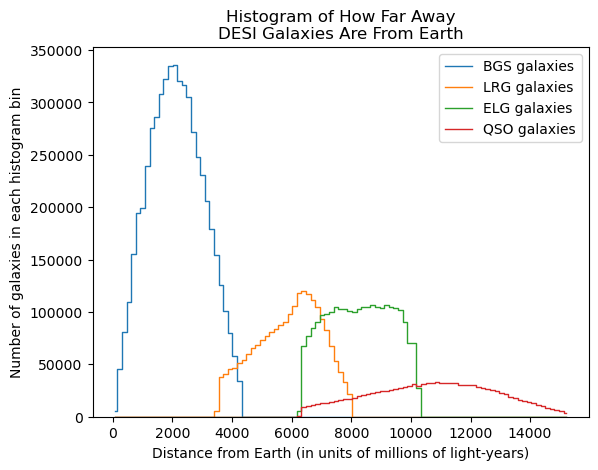

In [6]:

plot_galaxy_distribution(bin_centers, bgs_Mlyr_hist, label='BGS galaxies')
plot_galaxy_distribution(bin_centers, lrg_Mlyr_hist, label='LRG galaxies')
plot_galaxy_distribution(bin_centers, elg_Mlyr_hist, label='ELG galaxies')
plot_galaxy_distribution(bin_centers, qso_Mlyr_hist, label='QSO galaxies')

plt.gca().set_ylim(bottom=0)

plt.xlabel('Distance from Earth (in units of millions of light-years)')
plt.ylabel('Number of galaxies in each histogram bin')
plt.title('Histogram of How Far Away\nDESI Galaxies Are From Earth')

plt.legend()
plt.show()

In [8]:
spherical_shells = 4/3 * np.pi * (r_max**3 - r_min**3)

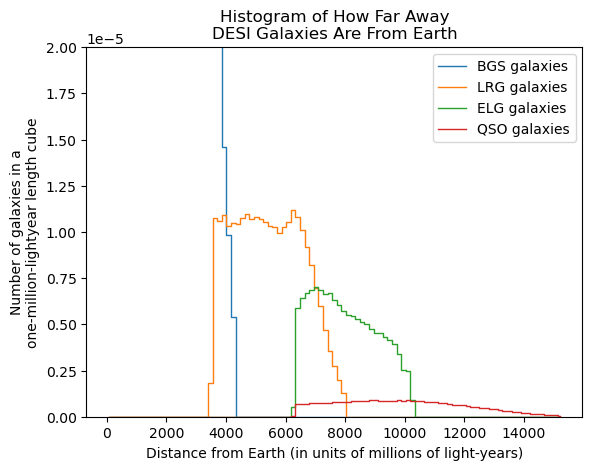

In [9]:

plot_galaxy_distribution(bin_centers, bgs_Mlyr_hist/ (get_sky_coverage_fraction('BGS') * spherical_shells), label='BGS galaxies')
plot_galaxy_distribution(bin_centers, lrg_Mlyr_hist/ (get_sky_coverage_fraction('LRG') * spherical_shells), label='LRG galaxies')
plot_galaxy_distribution(bin_centers, elg_Mlyr_hist/ (get_sky_coverage_fraction('ELG') * spherical_shells), label='ELG galaxies')
plot_galaxy_distribution(bin_centers, qso_Mlyr_hist/ (get_sky_coverage_fraction('QSO') * spherical_shells), label='QSO galaxies')

plt.ylim(0, 0.00002)

plt.xlabel('Distance from Earth (in units of millions of light-years)')
plt.ylabel('Number of galaxies in a\none-million-lightyear length cube')
plt.title('Histogram of How Far Away\nDESI Galaxies Are From Earth')

plt.legend()
plt.show()

In [ ]:
#import ...

## 1 - DESI Galaxies

When the tens of millions of galaxies in the DESI Survey are illustrated together in a map, we get the below image.

<img src="../../images/MTU-DESI-map.png" alt="" width="600"/>

image credit: Claire Lamman and the DESI Collaboration

At different distances from us, different types of galaxies are ideal for observing with the DESI Survey. DESI galaxies are then broken up into four main categories, also referred to as **tracers**. The DESI galaxy category closest to us is the **Bright Galaxy Survey (BGS)**. BGS tracers are bright galaxies that DESI can observe when atmospheric conditions make it difficult to detect other, fainter galaxies. Even then, BGS galaxies include galaxies that are four hundred thousand times fainter than what what you can see in the night sky with your own bare eyes.

Once we reach past X million light years from Earth, BGS galaxies are too dim to all be seen by the DESI Instrument. Instead, we observe a smaller selection of **luminous red galaxies (LRGs)**. LRGs are large, red elliptical galaxies that can often be found within massive galaxy clusters and that have long since stopped forming new stars. The old stellar populations in LRGs emit the red light that gives them their names.

<img src="../../images/elliptical_NGC_1316.jpeg" alt="" width="600"/>


The above image shows an example of the type of elliptical (egg-shaped) galaxy that can be found in the DESI LRG population (image credit: NASA, ESA, and The Hubble Heritage Team (STScI/AURA))

After reaching even further past X million light years from Earth, a different type of galaxy becomes ideal for observing with the DESI Survey. **Emission line galaxies (ELGs)** are named as such because of their intense star formation, which is detectable from **atomic emission lines** (we’ll get to that later). Compared to the elliptical LRGs, ELGs are more often spiral galaxies that emit blue light. The bright, young stars in ELGs are what make them ideal for observing whit DESI.

<img src="../../images/spiral_NGC_3596.jpg" alt="" width="600"/>

The above image shows the type of star-forming spiral galaxy that can be found in the DESI ELG population (image credit: ESA/Hubble & NASA, C. Kilpatrick)

The final type of DESI tracer is also the most distantly observed, past X million light years from Earth. These objects are **quasars (QSOs)**. QSOs occur when supermassive black holes in the centers of galaxies attract matter from their surroundings. As matter falls into the vicinity of the back hole, it heats up and glows bright, allowing QSOs to be seen from vast distances away. Some of the infalling matter in a QSO can also get ejected from the galaxy, forming distinctive jets.

<img src="../../images/quasar_artist_conception.jpg" alt="" width="600"/>

The above image shows an artist’s conception of a quasar (image credit: NASA, ESA and J. Olmsted (STScI))

Now that we’ve introduced the four types of DESI tracers (BGS, LRG, ELG, QSO), let’s assess how the different tracers populate DESI’s map of the universe.

In [ ]:
# excersize: load in the number vs lightyear histogram, have studnets plot it,
# have studnets normalize the histogram by volume to see the n(z)

But how do we measure distances?

To make a 3D map of the universe, we need a way to calculate how far away distant galaxies are from us. The light that these galaxies emit takes time to travel to us. As the light waves travel, they get stretched out to longer wavelengths by the expanding universe. The farther a galaxy is away from us, the more time it will take for its light to reach us, and the longer its wavelength will be. To the human eye, longer wavelengths of light appear red (while shorter wave lengths are blue), so we call the stretching of the light "redshift". The farther away a galaxy is from us, the redder its light appears (or in other words, it has a larger redshift). This gives us a natural way to measure distances to galaxies.

# *Exercise: Measuring Distances with Redshifts*

Let's use an observed redshift to measure the distance to a galaxy. This galaxy is far away, and we can barely make it out in [a photo](https://www.legacysurvey.org/viewer/?ra=191.487780&dec=58.985188&zoom=13&layer=ls-dr9&mark=191.487780,58.985188) by eye (center of the yellow circle)


<img src="../../images/desitarget.png" alt="" width="600"/>


This galaxy is an ELG, so we can imagine that up close, it looks something like the star-forming spiral galaxy we saw before.

We can break up the light from the galaxy into its full spectrum of wavelengths using a dispersing element (similar to a prism breaking up white light into a rainbow). This technique is called **spectroscopy**. If we make a graph of the flux (intensity) of light at each wavelength and zoom in on a region of interest, it will look something like this:


<img src="../../images/example-spectrum.png" alt="" width="600"/>


The big spike in the above spectrum is an atomic emission line that comes from ionized Oxygen atoms (OII) in the galaxy. The energy levels of atoms are **quantized**, with electrons habitating a series of shells with **discrete** energies.  When an electron transitions between two specific levels, light is always emitted at the same wavelength $\lambda_\text{emit}$ no matter what galaxy you're looking at. Due to the redshift of the light, we will observe the emission line occurring at a different wavelength (a redder color) $\lambda_{\text{obsv}}$. The redshift $z$ is calculated with the below formula:

$$
z = \frac{\lambda_{\text{obsv}} - \lambda_\text{emit}}{\lambda_\text{emit}}
$$

From experiments here on Earth, we know that the true OII emission line $\lambda_\text{emit}$ occurs at a wavelength of 373 nanometers. Try using the above spectra to figure out the observed wavelength $\lambda_{\text{obsv}}$ of the light (in other words, at what wavelength is the OII peak located at?). Then, **enter that value into the below code and run it to calculate the redshift of the galaxy**.

In [ ]:
lambda_obsv = # fill in value here
lambda_emit = 373 # nanometers

redshift = (lambda_obsv - lambda_emit) / lambda_emit

print(f'The redshift of the galaxy is {redshift:.3f}')

Now, let's convert this redshift into a distance. To do this, we'll want the help of a cosmology model. We'll use a python module to load in a cosmology model for us. Try running the below code to convert your measured redshift into a distance.

In [ ]:
#Let's load some tools that will help us learn about cosmology
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

# Create a cosmology model for converting redshifts to distances
cosmology_model = FlatLambdaCDM(Om0=.315, H0=67.4)

# Convert our measured redshift to a distance measurement using the model
distance = cosmology_model.comoving_distance(redshift).to(u.Mlyr)

# Report the distance to the galaxy
print(f'The galaxy is {distance.value:.0f} billion light-years away from us')

The [DESI value](https://www.legacysurvey.org/viewer/desi-spectrum/edr/targetid39633374838524834) for the distance to this galaxy using our cosmology model is 13988 billion light-years. How does your measured value compare?

# *Using Spectroscopy to Study Dark Energy*

You've now had some practice using spectroscopic data to identify emission lines, calculate redshifts, and calculate distances to galaxies given a cosmology model. By repeating a process similar to this with the aid of a spectroscopic instrument and for many galaxies, we can make a map of our universe. This map can in turn tell us about the validity of our cosmology model and about the nature of dark energy. DESI High welcomes you to explore a wide range of notebooks that will give you hands-on experience working with DESI data and teach you what we can learn about our universe from DESI. 